## Problem Statement

#### Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.The company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount,Credit History and others. 

#### To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can  specifically target these customers.So the final thing is to identify the factors/customer segments that are eligible for taking loan. How will the company benefit if we give the  customer segments is the immediate question that arises. The solution is …. Banks would give loans to only those customers that are eligible so that can be assured of getting the money back.

### Now let’s walk through the code. Firstly I just imported the necessary packages like pandas, numpy, seaborn etc. so that i can carry the necessary operations further.

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the data from the file/dataset:

In [268]:
df = pd.read_csv('Loan.csv')
df.shape

(614, 13)

In [269]:
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Understanding the various features (columns) of the dataset.

In [270]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [271]:
# Get the unique values and their frequency of variable Property_Area

df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

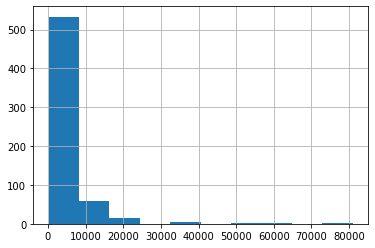

In [272]:
# Box Plot for understanding the distributions and to observe the outliers.

%matplotlib inline

# Histogram of variable ApplicantIncome

df['ApplicantIncome'].hist()

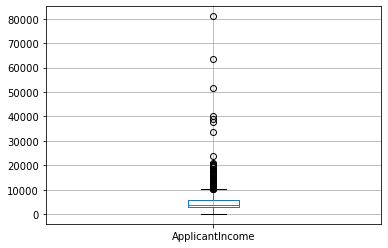

In [273]:

# Box Plot for variable ApplicantIncome of training data set

df.boxplot(column='ApplicantIncome')

### The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

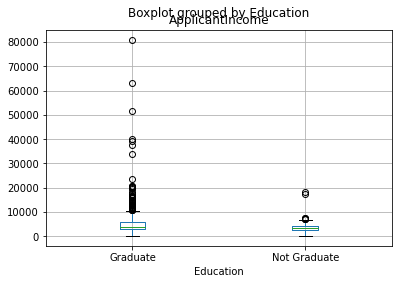

In [274]:

# Box Plot for variable ApplicantIncome by variable Education of training data set

df.boxplot(column='ApplicantIncome', by = 'Education')
plt.show()


 
### We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers

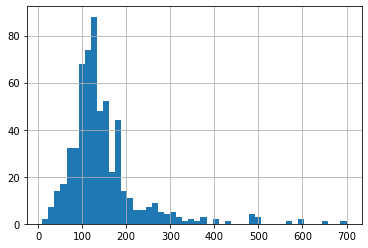

In [275]:

# Histogram of variable LoanAmount

df['LoanAmount'].hist(bins=50)
plt.show()

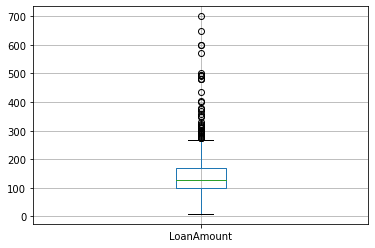

In [276]:
# Box Plot for variable LoanAmount of training data set

df.boxplot(column='LoanAmount')
plt.show()

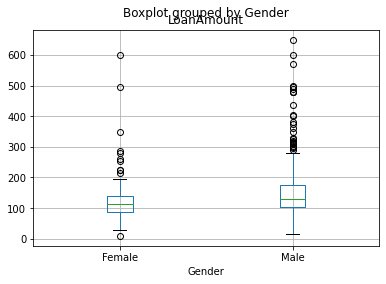

In [277]:
# Box Plot for variable LoanAmount by variable Gender of training data set

df.boxplot(column='LoanAmount', by = 'Gender')
plt.show()

### Data cleaning and filling missing values:

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Missing Values : Check where there are missing values and fix them appropriately

In [279]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [280]:
total = df.isnull().sum()
total

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [281]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [282]:
df.Gender = df.Gender.fillna('Male')

In [283]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [284]:
df.Married = df.Married.fillna('Yes')

In [285]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [286]:
df.Dependents = df.Dependents.fillna('0')

In [287]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [288]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [289]:
df.LoanAmount.mean()

146.41216216216216

In [290]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [291]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [292]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)

In [293]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [294]:
df.Credit_History = df.Credit_History.fillna(1.0)

In [295]:
total = df.isnull().sum()

In [296]:
total

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [297]:
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


## Converting the Categorical variable into Numeric


#### sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. And to convert this kind of categorical text data into model-understandable  numerical data, we use the LabelEncoder class. So all we have to do,is to import the LabelEncoder class from the sklearn library, fit and transform the columns of the data.

In [298]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status',]
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])


In [299]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [300]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,0,0,0,0,1,4583,0.0,133.0,360.0,0.0,1,0


## Feature Selection

#### Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables)

In [301]:
## The iloc indexer for Pandas Dataframe is used for integer-location
## based indexing / selection by position.
X = df.iloc[:,1:12]
y = df.iloc[:,12]

In [302]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [303]:
y.head().reset_index()

,index,Loan_Status
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


## Splitting Data:


#### To understand model performance, dividing the dataset into a training set and a test set is a good strategy. Let's split the dataset by using function train_test_split(). You need to pass 4 parameters  features, target, test_size, and random_sate.

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

In [306]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
90,1,1,0,0,0,2958,2900.0,131.0,360.0,1.0,1
533,1,0,1,0,0,11250,0.0,196.0,360.0,1.0,1
452,1,1,0,0,0,3948,1733.0,149.0,360.0,0.0,0
355,0,0,0,0,0,3813,0.0,116.0,180.0,1.0,2
266,1,1,2,0,0,4708,1387.0,150.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,3103,1300.0,80.0,360.0,1.0,2
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1
359,1,1,3,0,0,5167,3167.0,200.0,360.0,1.0,1
192,1,1,0,1,0,6033,0.0,160.0,360.0,1.0,2


In [307]:
y_train

90     1
533    0
452    0
355    1
266    1
      ..
277    1
9      0
359    1
192    0
559    1
Name: Loan_Status, Length: 491, dtype: int32

In [308]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1,0,0,0,1,7085,0.0,84.0,360.0,1.0,1
52,0,0,0,0,0,4230,0.0,112.0,360.0,1.0,1
536,1,1,0,0,0,6133,3906.0,324.0,360.0,1.0,2
469,1,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2
55,1,1,2,0,0,2708,1167.0,97.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
337,1,1,2,0,1,2500,4600.0,176.0,360.0,1.0,0
376,1,1,3,0,0,8750,4996.0,130.0,360.0,1.0,0
278,1,1,0,0,0,14583,0.0,436.0,360.0,1.0,1
466,1,1,3,1,0,2947,1664.0,70.0,180.0,0.0,2


In [309]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int32

 ## Building Decision Tree Model:

In [310]:
from sklearn.tree import DecisionTreeClassifier

In [311]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_predictions = model.predict(X_test)

In [312]:
y_predictions

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [313]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int32

## Evaluating Model:

In [314]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_predictions)
cnf_matrix

array([[20, 13],
       [24, 66]], dtype=int64)

In [315]:
print('Accuracy:',metrics.accuracy_score(y_test,y_predictions)*100)

Accuracy: 69.91869918699187


## Building Logistic Regression Model:

#### First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [316]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [317]:
y_pred = logistic_regression.predict(X_test)

In [318]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [319]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int32

## Model Evaluation

In [320]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
cnf_matrix

array([[15,  2],
       [18, 88]], dtype=int64)

#### The dimension of this matrix is 2*2 because this model is binaryclassification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 15 and 88 are actual predictions, and 18 and 2 are incorrect predictions.This means out of 123, we got 103 correct prediction and 20 incorrect prediction.

In [321]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 83.73983739837398


## Visualizing Confusion Matrix using Heatmap


In [322]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

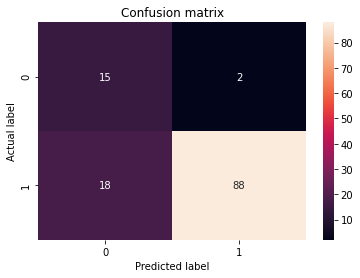

In [323]:
sns.heatmap(cnf_matrix,annot = True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

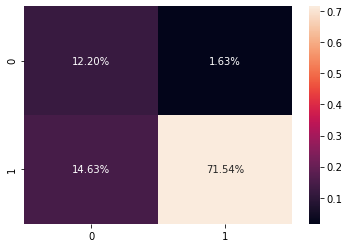

In [324]:
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot = True, fmt = '.2%')
plt.show()

### Let's predict whether the loan will get approved or not for a person(John) who is applying for the  loan with the following details:

 ### Convert the categorical variable value into numeric form.
#### Gender : Male (1)
#### Married: Yes (1)
#### Dependents: 1
#### Education: Graduate (0)
#### Self_Employed: No (0)
#### ApplicantIncome: 8000
#### CoapplicantIncome: 2000
#### LoanAmount (in thousand): 130
#### Loan_Amount_Term(Term of loan in months): 24
#### Credit_History: 0.0
#### Property_Area (Urban/ Semi Urban/ Rural): Urban (2)



In [327]:
loanstatus = logistic_regression.predict([[1,1,1,0,0,8000,2000,130,24,0.0,2]])
loanstatus

array([1])